# Customer Segmentation Using Kmeans clustering 

## Step 1: Import Dependencies

In [82]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 2: Import Data

In [6]:
# Importing the dataset
df = pd.read_csv(r'Mall_Customers.csv',
                 index_col=0,
                 header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Step 3: EDA 

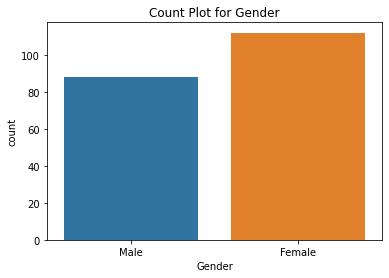

In [30]:
# count plot on single categorical variable
sns.countplot(x ='Gender', data = df)

plt.title("Count Plot for Gender")
plt.show()

In [11]:
df["Gender"].value_counts() 

Female    112
Male       88
Name: Gender, dtype: int64

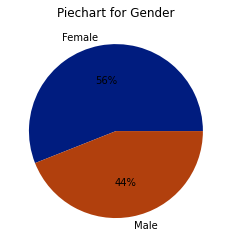

In [29]:
# declaring data
data = [112, 88]
keys = ['Female', 'Male']
  
# declaring exploding pie
explode = [0, 0]

# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title("Piechart for Gender")
  
# displaying chart
plt.show()

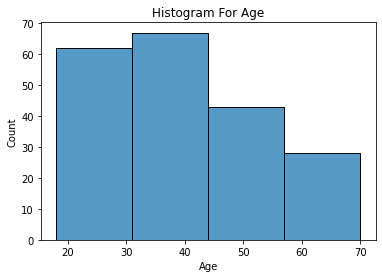

In [28]:
# Plot histogram
sns.histplot(data = df, 
             x="Age",
             bins=4,
             kde = False)
plt.title("Histogram For Age")
plt.show()

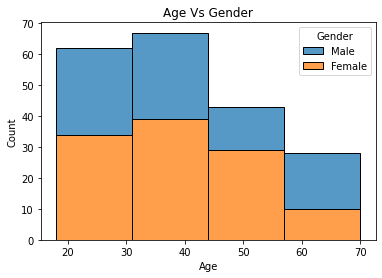

In [27]:
sns.histplot(data = df, 
             x="Age",
             bins=4,
             hue="Gender",
             multiple="stack",
             kde = False)
plt.title("Age Vs Gender")
plt.show()

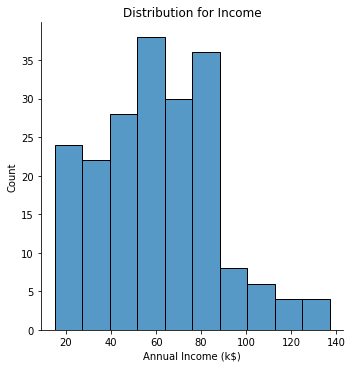

In [34]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Distribution for Income")
plt.show()

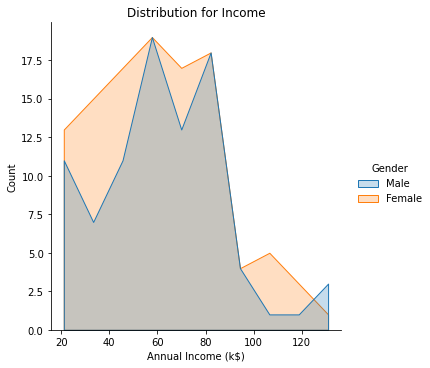

In [37]:
sns.displot(df, x="Annual Income (k$)", hue="Gender",element="poly")
plt.title("Distribution for Income with Gender")
plt.show()

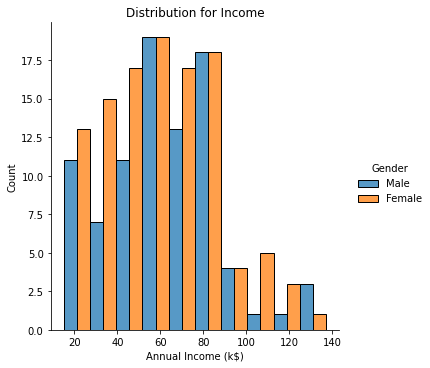

In [38]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple="dodge")
plt.title("Distribution for Income with Gender")
plt.show()

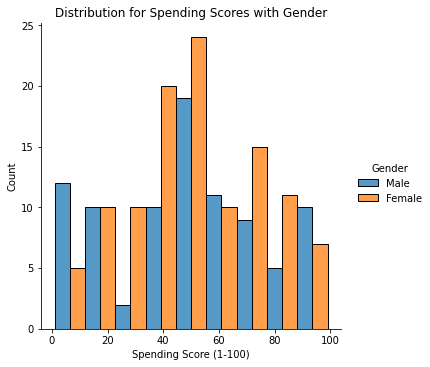

In [39]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple="dodge")
plt.title("Distribution for Spending Scores with Gender")
plt.show()

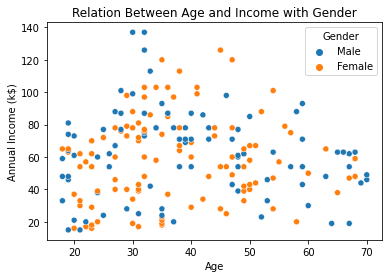

In [43]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Relation Between Age and Income with Gender")
plt.show()

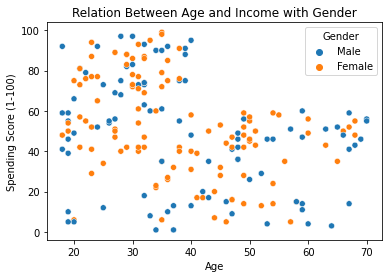

In [44]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Age and Score with Gender")
plt.show()

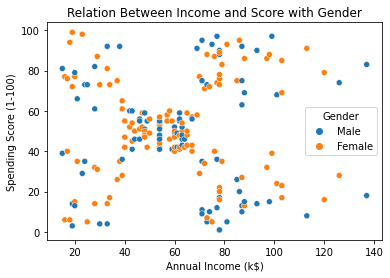

In [47]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Income and Score with Gender")
plt.show()

## Step 4: Data Preprocessing

In [49]:
print(df.shape) 
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [50]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [53]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

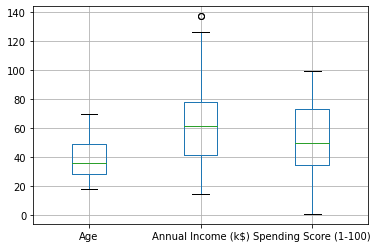

In [52]:
df.boxplot()
plt.show()

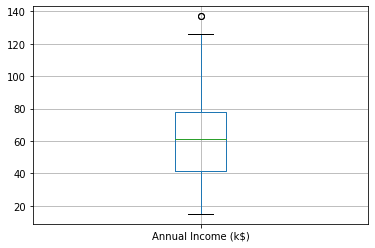

In [55]:
df.boxplot("Annual Income (k$)")
plt.show()

In [58]:
X = df.iloc[: , 2:4] # [   start_row  : stop_row , start_col: stop_col   ]

In [93]:
%%time 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15
wsse = []
# progress bar 
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1, K_MAX):

        kmeans = KMeans(n_clusters = i,   random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)

  0%|          | 0/14 [00:00<?, ?it/s]

Wall time: 1.01 s


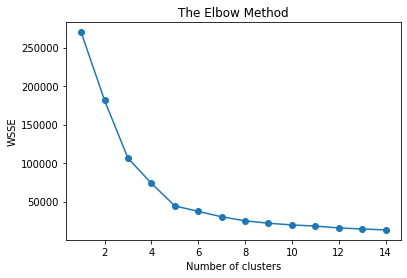

In [95]:
    
    
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [96]:
print(wsse[4])

44448.45544793369


In [101]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
kmeans.fit(X)
Y_pred = kmeans.predict(X)

In [102]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [100]:
kmeans.n_iter_

5

In [99]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


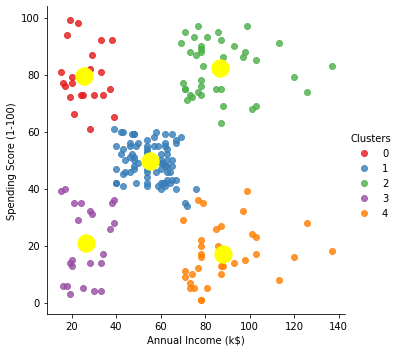

In [105]:
sns.lmplot(data=df, 
           x='Annual Income (k$)',
           y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',
           palette="Set1")  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [107]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",
                              3:"NotUseful",4:"Careful"})

In [108]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,NotUseful
2,Male,21,15,81,Careless
3,Female,20,16,6,NotUseful
4,Female,23,16,77,Careless
5,Female,31,17,40,NotUseful


In [ ]:
df.to_csv(r"TargetCustomers.csv",index=True)

In [ ]:
LINE 2D
HYPER PLANE  3D